In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb

# Importing the datasets

In [3]:
songs=pd.read_csv("songs.csv")
songs_extra=pd.read_csv("song_extra_info.csv")
members=pd.read_csv("members.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

# Checking and Prepairing all the datasets

In [4]:
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209424 entries, 0 to 1209423
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1209424 non-null  object 
 1   song_length  1209423 non-null  float64
 2   genre_ids    1165091 non-null  object 
 3   artist_name  1209423 non-null  object 
 4   composer     655487 non-null   object 
 5   lyricist     210307 non-null   object 
 6   language     1209422 non-null  float64
dtypes: float64(2), object(5)
memory usage: 64.6+ MB


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640.0,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328.0,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781.0,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554.0,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329.0,726,貴族精選,Traditional,Traditional,52.0


### Songs dataset can be used ^

In [5]:
songs.isnull().sum()
songs["genre_ids"].value_counts()

465              331374
2022              86798
1609              86425
958               86097
2122              66589
                  ...  
465|873|786           1
1630|2022             1
409|2022              1
388|359               1
1969|444|2100         1
Name: genre_ids, Length: 904, dtype: int64

In [6]:
songs["genre_ids"]=songs["genre_ids"].fillna(songs["genre_ids"].mode()[0])
songs=songs.drop(["composer","lyricist","artist_name","genre_ids"],axis=1)
songs.dropna(inplace=True)
songs["song_id"]=songs["song_id"].astype(str)

In [7]:
songs.isnull().sum()

song_id        0
song_length    0
language       0
dtype: int64

In [8]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
songs_extra.isna().sum()

song_id         0
name            2
isrc       104413
dtype: int64

### songs_extra dataset cannot be used due to too many null values in isrc column ^

In [10]:
members.info()
members.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [11]:
members.isna().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [12]:
members["gender"]=members["gender"].astype(str)
members["gender"].value_counts()

nan       19902
male       7405
female     7096
Name: gender, dtype: int64

In [13]:
import random
def gender(value):
    if value=="male":
        return 1
    elif value=="female":
        return 2
    else:
        return random.choice([1,2])

members["gender"]=members["gender"].map(gender)
members["gender"].value_counts()

1    17323
2    17080
Name: gender, dtype: int64

In [14]:
members.isna().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

### Members dataset can be used ^

In [15]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869715 entries, 0 to 869714
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                869715 non-null  object 
 1   song_id             869715 non-null  object 
 2   source_system_tab   867278 non-null  object 
 3   source_screen_name  830186 non-null  object 
 4   source_type         867599 non-null  object 
 5   target              869714 non-null  float64
dtypes: float64(1), object(5)
memory usage: 39.8+ MB


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [16]:
train.isna().sum()

msno                      0
song_id                   0
source_system_tab      2437
source_screen_name    39529
source_type            2116
target                    1
dtype: int64

In [17]:
train["source_system_tab"]=train["source_system_tab"].fillna(train["source_system_tab"].mode()[0])
train["source_screen_name"]=train["source_screen_name"].fillna(train["source_screen_name"].mode()[0])
train["source_type"]=train["source_type"].fillna(train["source_type"].mode()[0])
train["song_id"]=train["song_id"].astype(str)
train.dropna(axis=0, inplace=True)
train.isna().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

### train dataset can be used ^

# Merging datasets

In [21]:
df2=pd.merge(train,songs,on="song_id")
df2.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,language
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,225396.0,52.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,255512.0,-1.0
2,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,187802.0,52.0
3,wIO+B1ZSvdIOBD/uwCL/plYMnDebWbJIRPAJJGqE0tU=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,discover,Discover Chart,online-playlist,1.0,187802.0,52.0
4,SK6Z0OK1LCuTaEhFc4E24h7Hohl6RM0EpZcnWXNsrs4=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,discover,Online playlist more,online-playlist,0.0,187802.0,52.0


In [22]:
df1=pd.merge(df2,members,on="msno")
df1.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,225396.0,52.0,13,24,2,9,20110525,20170911
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,255512.0,-1.0,13,24,2,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1.0,229982.0,31.0,13,24,2,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,WL4ipO3Mx9pxd4FMs69ha6o9541+fLeOow67Qkrfnro=,my library,Local playlist more,local-library,1.0,231549.0,3.0,13,24,2,9,20110525,20170911
4,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1.0,219324.0,3.0,13,24,2,9,20110525,20170911


## Applying LabelEncoder on df1

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
msno=le.fit_transform(df1["msno"])
song_id=le.fit_transform(df1["song_id"])
source_system_tab=le.fit_transform(df1["source_system_tab"])
source_screen_name=le.fit_transform(df1["source_screen_name"])
source_type=le.fit_transform(df1["source_type"])

df1["msno"]=msno
df1["song_id"]=song_id
df1["source_system_tab"]=source_system_tab
df1["source_screen_name"]=source_screen_name
df1["source_type"]=source_type

df1.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,9217,28963,3,8,4,1.0,225396.0,52.0,13,24,2,9,20110525,20170911
1,9217,5581,3,8,4,1.0,255512.0,-1.0,13,24,2,9,20110525,20170911
2,9217,45615,3,8,4,1.0,229982.0,31.0,13,24,2,9,20110525,20170911
3,9217,46390,3,8,3,1.0,231549.0,3.0,13,24,2,9,20110525,20170911
4,9217,74972,3,8,3,1.0,219324.0,3.0,13,24,2,9,20110525,20170911


## Applying label encoder on training data

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

msno=le.fit_transform(train["msno"])
song_id=le.fit_transform(train["song_id"])
source_system_tab=le.fit_transform(train["source_system_tab"])
source_screen_name=le.fit_transform(train["source_screen_name"])
source_type=le.fit_transform(train["source_type"])

train["msno"]=msno
train["song_id"]=song_id
train["source_system_tab"]=source_system_tab
train["source_screen_name"]=source_screen_name
train["source_type"]=source_type

train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,4388,21729,1,7,5,1.0
1,9276,65040,3,8,4,1.0
2,9276,35181,3,8,4,1.0
3,9276,6773,3,8,4,1.0
4,4388,9534,1,7,5,1.0


array([[<Axes: title={'center': 'msno'}>,
        <Axes: title={'center': 'song_id'}>],
       [<Axes: title={'center': 'source_system_tab'}>,
        <Axes: title={'center': 'source_screen_name'}>],
       [<Axes: title={'center': 'source_type'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

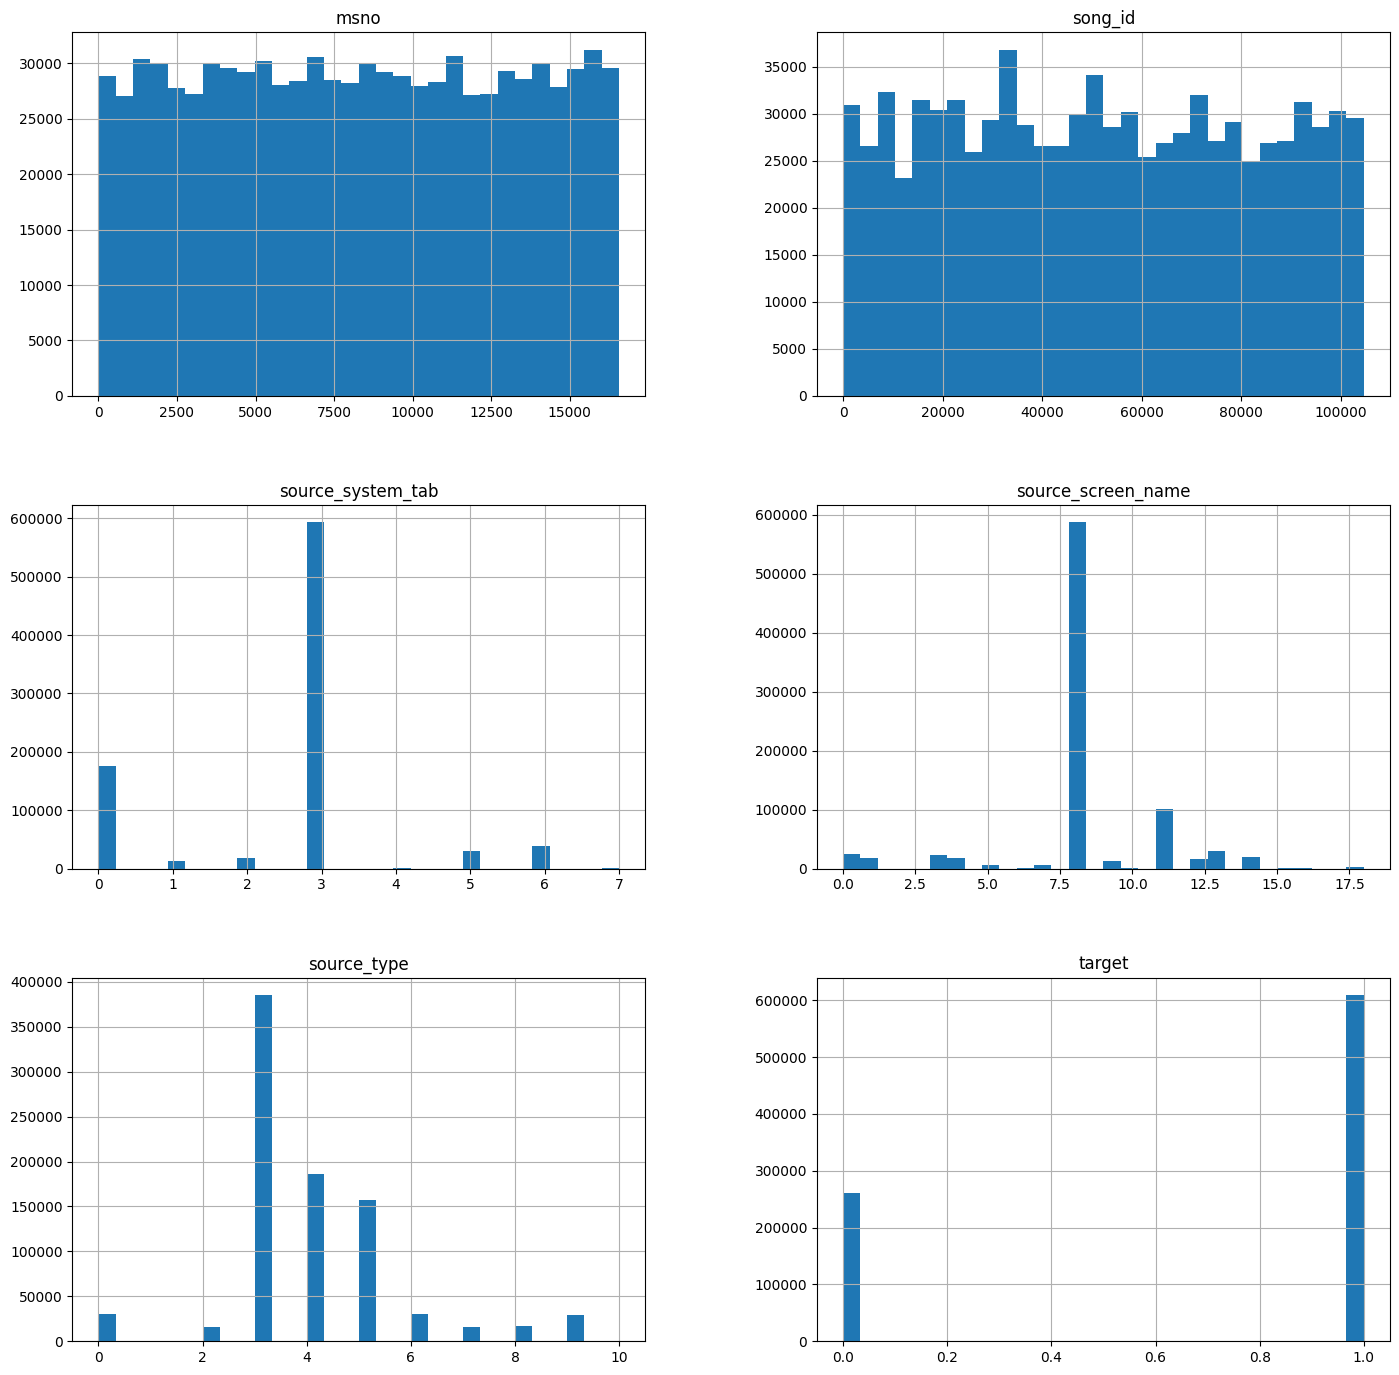

In [25]:
train.hist(bins=30, figsize=(17,17))

<Axes: >

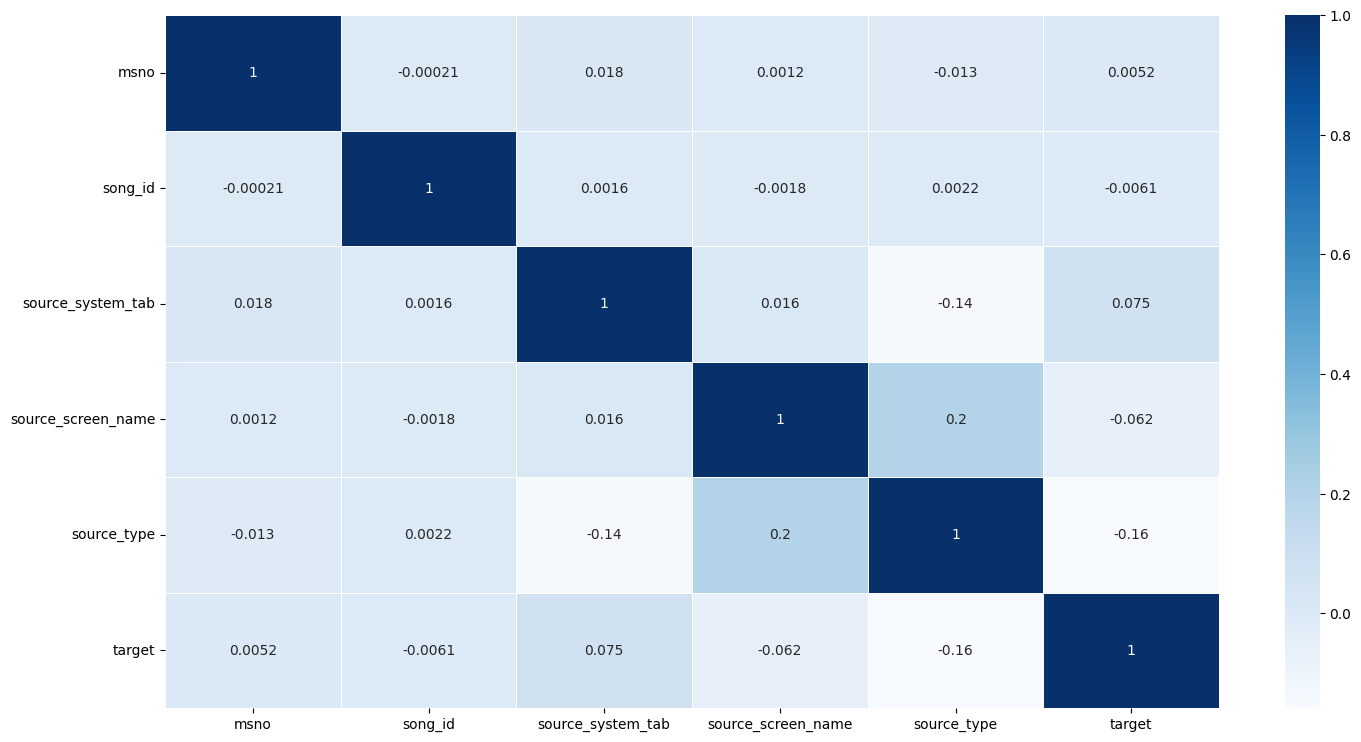

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation=train.corr()
plt.figure(figsize=(17,9))
sns.heatmap(correlation,annot=True,cmap='Blues',linewidths=0.5)

array([[<Axes: title={'center': 'msno'}>,
        <Axes: title={'center': 'song_id'}>,
        <Axes: title={'center': 'source_system_tab'}>,
        <Axes: title={'center': 'source_screen_name'}>],
       [<Axes: title={'center': 'source_type'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'song_length'}>,
        <Axes: title={'center': 'language'}>],
       [<Axes: title={'center': 'city'}>, <Axes: title={'center': 'bd'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'registered_via'}>],
       [<Axes: title={'center': 'registration_init_time'}>,
        <Axes: title={'center': 'expiration_date'}>, <Axes: >, <Axes: >]],
      dtype=object)

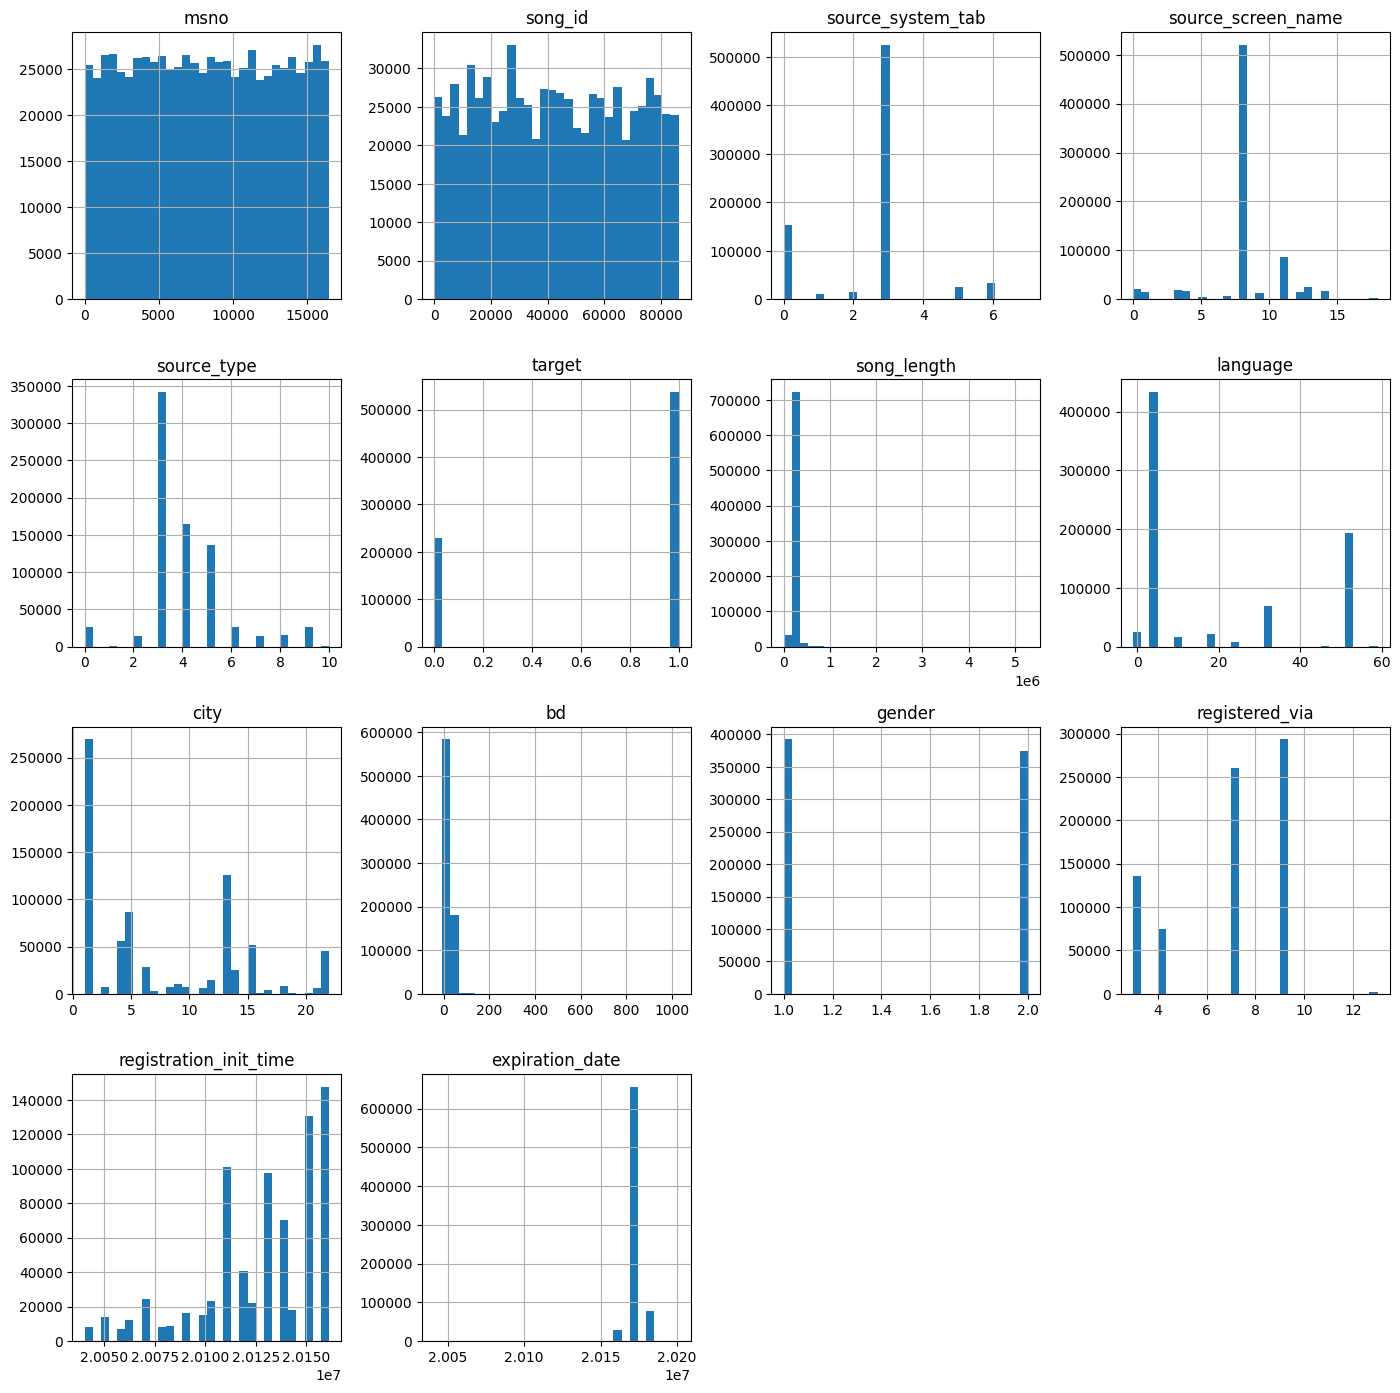

In [27]:
df1.hist(bins=30, figsize=(17,17))

<Axes: >

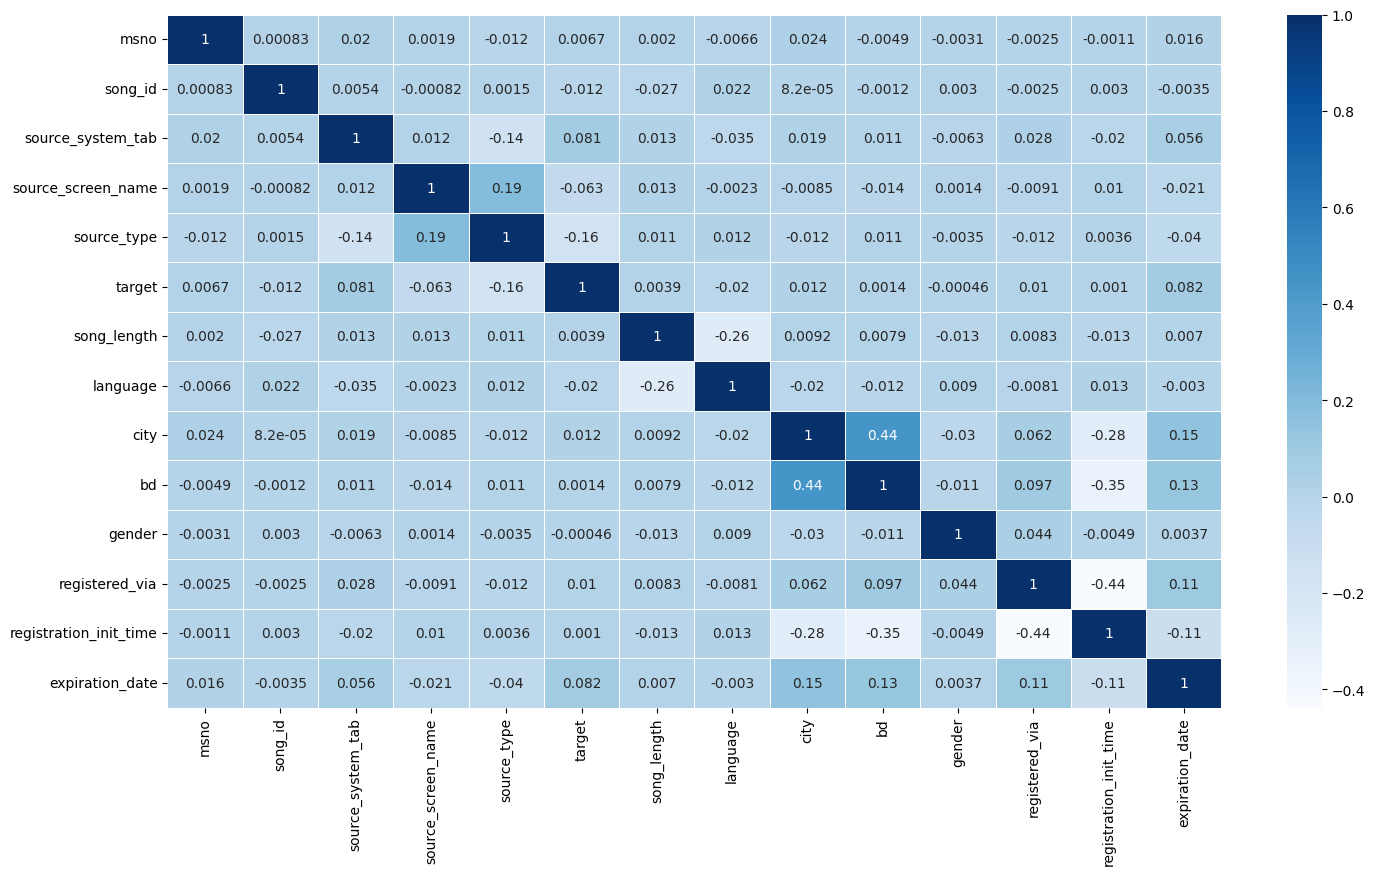

In [28]:
correlation=df1.corr()
plt.figure(figsize=(17,9))
sns.heatmap(correlation,annot=True,cmap='Blues',linewidths=0.5)

# Modelling on train dataset

In [29]:
X=train.iloc[:,:-1]
y=train["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 200
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data,test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_class = (y_pred > 0.5).astype(int)



[LightGBM] [Info] Number of positive: 426192, number of negative: 182607
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 608799, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700054 -> initscore=0.847554
[LightGBM] [Info] Start training from score 0.847554


In [30]:
acc=y_pred_class.sum()/y_pred_class.size*100
print("Accuracy of model",acc)

Accuracy of model 82.82812410171894


#Training model on df1 dataset

In [31]:
X=df1.drop("target",axis=1)
y=df1["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
num_round = 200
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data,test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_class = (y_pred > 0.5).astype(int)

[LightGBM] [Info] Number of positive: 376187, number of negative: 160220
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1427
[LightGBM] [Info] Number of data points in the train set: 536407, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.701309 -> initscore=0.853538
[LightGBM] [Info] Start training from score 0.853538


In [32]:
acc=y_pred_class.sum()/y_pred_class.size*100
print("Accuracy of model",acc)

Accuracy of model 82.96134221298105
